___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Linear Regression with Python


Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

Your neighbor then gives you some information about a bunch of houses in regions of the United States,it is all in the data set: USA_Housing.csv.

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

**Let's get started!**
## Check out the data
We've been able to get some data from your neighbor for housing prices as a csv set, let's get our environment ready with the libraries we'll need and then import the data!
### Import Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Check out the Data

In [2]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [14]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [5]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# EDA

Let's create some simple plots to check out the data!

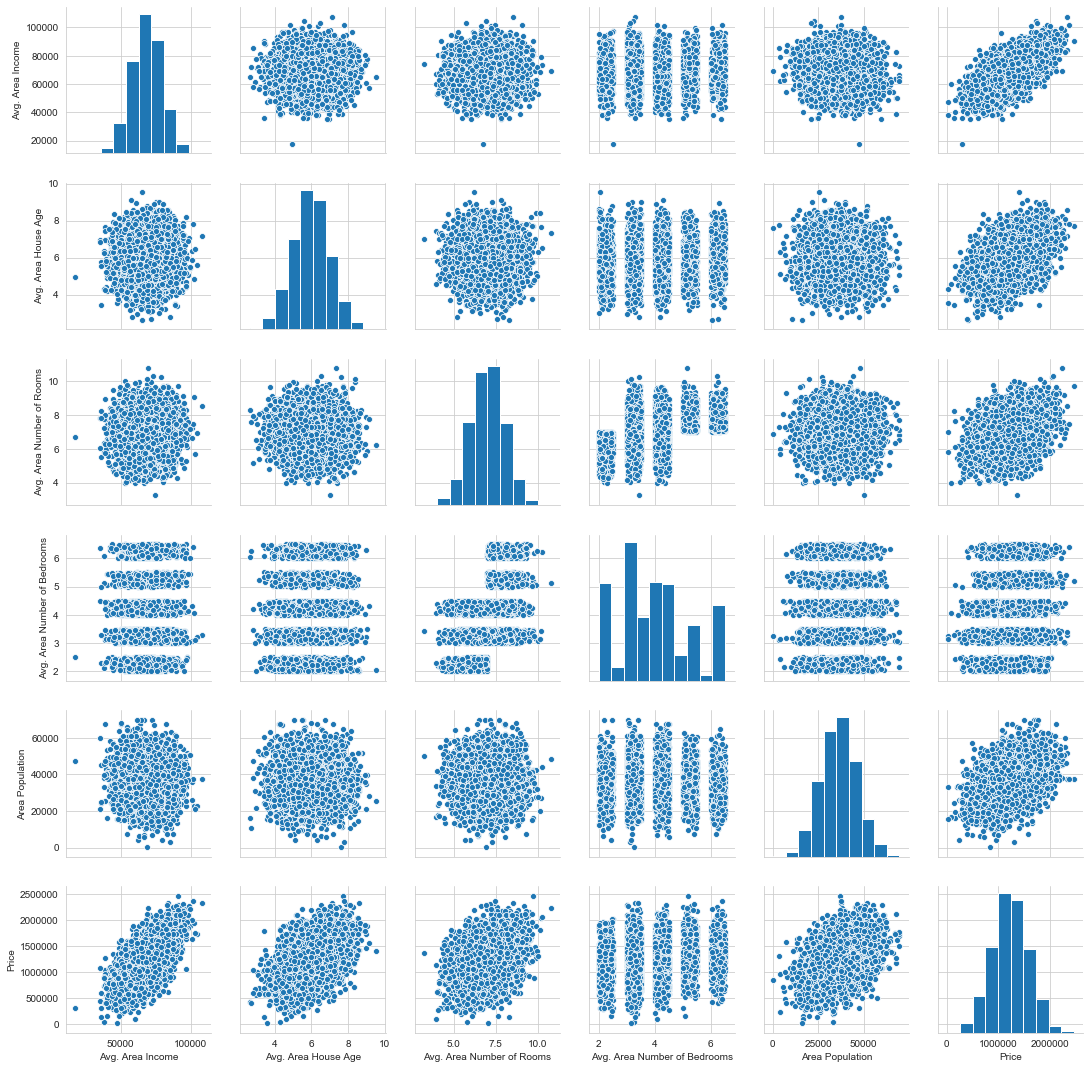

In [8]:
sns.set_style('whitegrid')
sns.pairplot(USAhousing);

#automatically creates histograms and correlation scatter plots for each variable
#data for 'Avg. number of bedrooms' is segmented,
#becasue you cant have 'half' a bedroom

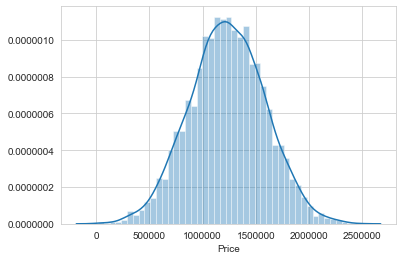

In [9]:
sns.distplot(USAhousing['Price'])
#Because we are trying to find the house price, we created a plot for this column
#Average house price is between 1-1.5M
#This graph is farily normally distributed

In [15]:
USAhousing.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


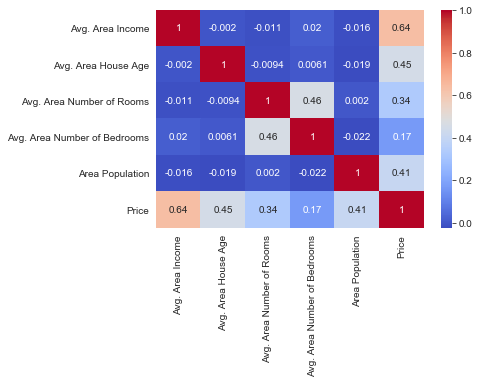

In [16]:
sns.heatmap(USAhousing.corr(), cmap='coolwarm',annot=True);
#An alternate method to the pairplot, for showing the correlations between the various housing features

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [19]:
USAhousing.columns #Grab the column names first

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [5]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]   #X contains our features 

y = USAhousing['Price']  #y is the target variable (house prices in this case)

## Train Test Split

Now let's split the data into a training set and a testing set. We will train our model on the training set and then use the test set to evaluate the model.

In [3]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
#test_size: % of your dataset, that you want allocated to your test size
#random_state: ensures a specific number of random splits on your data
               #(it could be any number)

## Creating and Training the Model

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lm = LinearRegression()

In [9]:
lm.fit(X_train,y_train)
#fits the training data to a linear model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [10]:
# print the (y)intercept
print(lm.intercept_)

-2640159.796851911


In [26]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient']) #creates a df out of the coefficients
coeff_df                                                            #the coefficients relate to each feature

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.

Does this make sense? Probably not because I made up this data. If you want real data to repeat this sort of analysis, check out the [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):



    from sklearn.datasets import load_boston
    boston = load_boston()
    print(boston.DESCR)
    boston_df = boston.data

We will analyse this data later on

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [11]:
predictions = lm.predict(X_test) #prediction for testing set of the features
predictions

array([1260960.70567626,  827588.75560352, 1742421.24254328, ...,
        372191.40626952, 1365217.15140895, 1914519.54178824])

In [50]:
y_test.head() 
#we want to know how far off the predictions (X) are from the target values (y)
#y_test contains the correct prices of the houses

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
Name: Price, dtype: float64

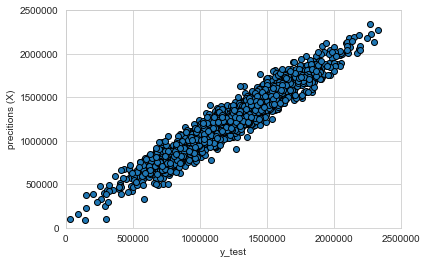

In [26]:
sns.set_style('whitegrid')

plt.scatter(y_test,predictions,edgecolor="black")
plt.xlim(0,2500000)
plt.ylim(0,2500000)
plt.xlabel('y_test')
plt.ylabel('precitions (X)');

#The positive correlation, shows that these predictions are accurate for the most part

**Residual Histogram**

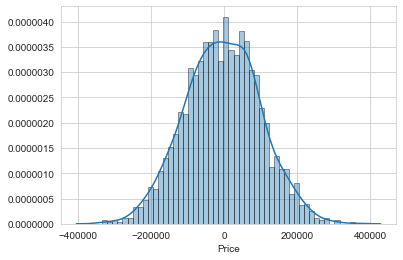

In [60]:
sns.distplot((y_test-predictions),bins=50,hist_kws=dict(edgecolor="k")); 
#residuals= y_test-predictions
        # =actual house prices-predictions
    
#residuals are normally distributed, which is good
#This shows that choosing to do a Linear regression, was a good model choice

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE  (Variance)**  is more popular than MAE, because MSE "punishes" larger errors,which tends to be useful in the real world --> <font size="2">Larger errors are squared.</font>
- **RMSE  (Standard deviation)**   is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.
They are all variations in measuring residuals. 

In [18]:
from sklearn import metrics

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914957
MSE: 10460958907.209501
RMSE: 102278.82922291153


Congrats on helping your neighbor out! We'll let this end here for now, but we will go ahead and explore the Boston Dataset mentioned earlier.

### Great Job!

<hr>

<i><font size="8">Boston House Prices: Dataset</font>

## Grabbing the data

In [27]:
from sklearn.datasets import load_boston #loads the dataset of boston house prices

In [28]:
boston = load_boston()

In [29]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [30]:
print(boston.DESCR) #.DESCR describes the whole dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [41]:
boston_df = boston.data

In [32]:
boston_df #produces arrays of the housing features data. 
          #This is all disorganised, so we'll need to make a dataframe out of it

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [33]:
print(boston['feature_names']) #columns of the df

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [34]:
print(boston['target']) #target house prices(in thousands)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

## Creating a dataframe

In [42]:
df_feat=pd.DataFrame(boston_df,columns=boston['feature_names']) #compose a dataframe

In [45]:
bos_feat=df_feat.drop(['B'],axis=1) #I removed the 'B' feature as it had no bearing on the end result

In [46]:
bos_feat.head() #dataframe of just the features, that contribute to the house prices

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33


        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - LSTAT    % lower status of the population

## EDA (Exploratory Data Analysis)

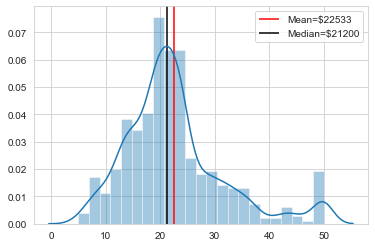

In [63]:
sns.distplot(boston['target'])
plt.ylim(*plt.ylim())
plt.vlines(boston['target'].mean(), *plt.ylim(),label='Mean=$22533',color='red')
plt.vlines(np.median(boston_array), *plt.ylim(),label='Median=$21200')
plt.legend();
#Because we are trying to find the house price, we created a plot for them
#This data could be seen as a bimodal normal distribution, because there are 2 distinct peaks
#The greatest peak is around slightly over $20000 --> suggesting that this is the average house price
#Upon calculation, the exact average house price is $22533

#There is another peak at $50000, but it issignificantly lower than the first peak
#As the 2nd peak is so low, it is more likely that this data could be classed as unimodal
#and skewing to the right vaguely

#This means that the majority of house prices are to the left of the histogram, with the tail being to the right
#median=$21200     mean>median


In [50]:
boston['target'].mean()

22.532806324110677

In [51]:
boston['target'].max()

50.0

In [52]:
boston['target'].min()

5.0

In [53]:
boston_array = np.array(boston['target'])
#I converted the list of house prices into an array, to allow me to do further analysis

In [54]:
np.median(boston_array)

21.2

In [55]:
Q1=np.percentile(boston_array,25) #Lower Quartile - 25% of the data is below this house price
Q1

17.025

In [56]:
Q3=np.percentile(boston_array,75) #Upper Quartile - 75% of the data is below this house price
Q3

25.0

In [57]:
IQR=Q3-Q1 #IQR - the middle 50% of data  -50% of the dataset is in this range
IQR

7.975000000000001

In [58]:
np.ptp(boston_array) #Range of the whole dataset

45.0

In [59]:
np.std(boston_array)

9.188011545278203

In [60]:
np.var(boston_array)

84.41955615616556

In [61]:
bos_feat.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993


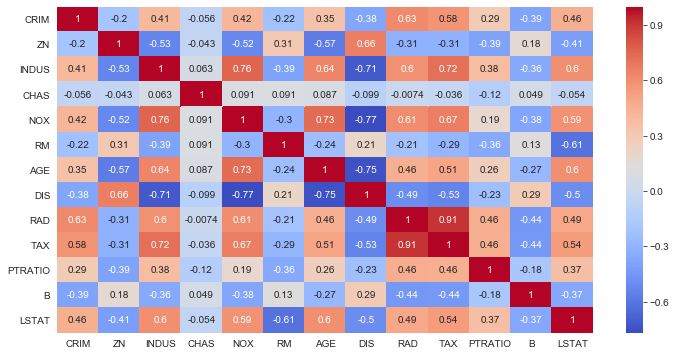

In [62]:
plt.figure(figsize=(12,6))
sns.heatmap(df_feat.corr(), cmap='coolwarm',annot=True);
#shows the correlations between the various housing features

Some noticeable correlations are:
- NOX and AGE : Makes sense as older houses (pre-1940), would tend to have more toxins
- NOX and DIS : As Toxins increase, distance from employment centres decreases dramatically
- NOX and INDUS: As Toxins increase, the proportion of non-retail businesses increases. This indicates that this could be due to industrial firms that release more toxins into the atmosphere
- INDUS and DIS: As the proportion of non-retail businesses increases, the distance from employment centres decreases
- DIS and AGE: As distance from eployment centres increases, the proportion of pre-1940 houses decreases. Maybe there are more old houses closer to the city centre, which is interesting.
- RAD and TAX: **Strongest correlation** --> As accessibility to highways increases, full-value property-tax rate (per $10000) increases-->suggesting that these properties hold more value as owners have to pay significantly more property tax
- TAX and INDUS:As property tax rate increases, the proportion of non-retail businesses increases

These are all relationships that are worthy of further investigation. I have done some EDA on some of them below:

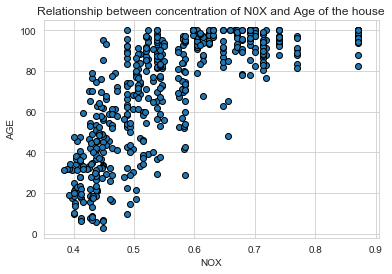

In [64]:
sns.set_style('whitegrid')

plt.scatter(df_feat['NOX'],df_feat['AGE'],edgecolor="black")
plt.xlabel('NOX')
plt.ylabel('AGE')
plt.title('Relationship between concentration of N0X and Age of the house');

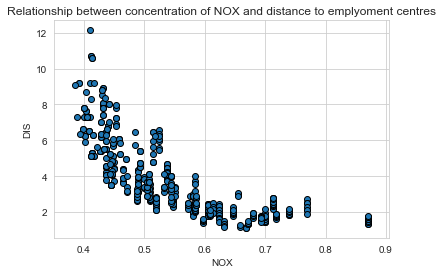

In [65]:
sns.set_style('whitegrid')

plt.scatter(df_feat['NOX'],df_feat['DIS'],edgecolor="black")
plt.xlabel('NOX')
plt.ylabel('DIS')
plt.title('Relationship between concentration of NOX and distance to emplyoment centres');

#As NOX levels increase, the distance to employment centres decreases exponentially, which is evident due to this scatter plot
#Correlation coefficient is -0.77

**Relationship between  <font color='maroon'><i>index of accessibility to radial highways</i></font> and <font color=' green'><i>full-value property-tax rate per $10,000</i></font>**

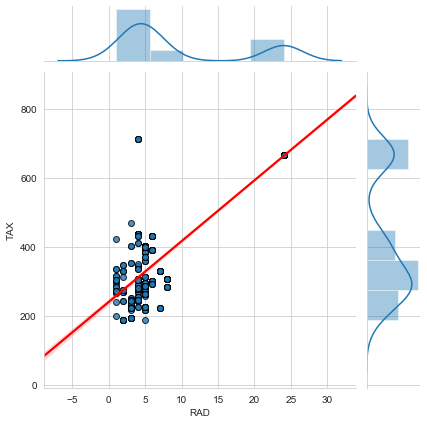

In [66]:
sns.jointplot(x='RAD',y='TAX',data=df_feat,kind='reg',
              scatter_kws={'edgecolor':"black"},line_kws={'color':'red'});

#This linear regression plot paints a slightly different picture
#Although the correlation between RAD and TAX is very strong, most of the values are clustered around RAD index 0 to 10
#Within this cluster, there is not necessarily a correlation

#There are 2 outliers: 1) TAX=$711, RAD=4    2) TAX=$666 RAD=24

#The normal distribution is bimodal,remphasising both of these peaks
#This further analysis shows that there is no clear cut trend between RAD and TAX

In [68]:
RAD_array=bos_feat['RAD']

In [73]:
TAX_array=bos_feat['TAX']

In [69]:
Q1_RAD=np.percentile(RAD_array,25)
Q1_RAD

4.0

In [70]:
Q3_RAD=np.percentile(RAD_array,75)
Q3_RAD

24.0

In [71]:
IQR=Q3_RAD-Q1_RAD
IQR

20.0

In [74]:
np.max(TAX_array)

711.0

In [75]:
from pandas import DataFrame

In [76]:
TAX_sort = DataFrame(df_feat, columns= ['TAX'])
TAX_sort.sort_values(by=['TAX'], inplace=True, ascending=False)
TAX_sort.head(6)

#I've made a new df just for TAX and put it in descending order, so that I can find the highest values

,TAX
492,711.0
491,711.0
490,711.0
489,711.0
488,711.0
405,666.0


In [77]:
df_feat.loc[df_feat.TAX == 711.0]['RAD']

488    4.0
489    4.0
490    4.0
491    4.0
492    4.0
Name: RAD, dtype: float64

In [78]:
df_feat.loc[df_feat.TAX == 666]['RAD'].head()

356    24.0
357    24.0
358    24.0
359    24.0
360    24.0
Name: RAD, dtype: float64

## Train-Test Split

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X=bos_feat
y=boston['target']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.33, random_state=42)

## Creating and training the model

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lm = LinearRegression()

In [84]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
print(lm.intercept_)  #print the (y)intercept

39.298554551681384


In [86]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient']) #creates a df out of the coefficients
coeff_df   

,Coefficient
CRIM,-0.141996
ZN,0.038257
INDUS,0.045610
CHAS,3.586924
NOX,-16.821569
RM,3.745181
AGE,-0.010847
DIS,-1.427075
RAD,0.214336
TAX,-0.008728


Interpreting the coefficients, given that all other features are still fixed:<br> 
- 1 unit increase in **crime rate per capita**, is associated with a <i>decrease of \$142.00</i> in house price.
- 1 unit increase in **proportion of residential zoned land**, is associated with an <i>increase of \$38.26</i> in house price.
- 1 unit increase in **proportion of of non-retail business acres per town**, is associated with an <i>increase of \$45.61</i> in house price.
- 1 unit increase in **Charles River dummy variable** (likelihood of tract bounding a river), is associated with an <i>increase of \$3586.92</i> in house price.
- 1 unit increase in **concentration of Nitric Oxides**, is associated with a <i>decrease of \$16821.57</i> in house price.
- 1 unit increase in **average number of rooms per house**, is associated with an <i>increase of \$3745.18</i> in house price.
- 1 unit increase in **proportion of owner-occupied units built prior to 1940**, is associated with a <i>decrease of \$10.85</i> in house price.
- 1 unit increase in **weighted distances to five Boston employment centres**, is associated with a <i>decrease of \$1427.08</i> in house price.
- 1 unit increase in **index of accessibility to radial highways**, is associated with a <i>increase of \$214.34</i> in house price.
- 1 unit increase in **property-tax rate per $10,000**, is associated with a <i>decrease of \$8.73</i> in house price.
- 1 unit increase in **pupil-teacher ratio**, is associated with a <i>decrease of \$908.70</i> in house price.
- 1 unit increase in **% lower status of the population**, is associated with a <i>decrease of \$572.77</i> in house price.   

In [87]:
predictions = lm.predict(X_test) #prediction for testing set of the features
predictions

array([28.45759328, 36.94034798, 15.01130441, 25.50243962, 17.6994546 ,
       23.19263435, 17.07927304, 13.50682586, 22.12763554, 20.22919805,
       24.89432993, 18.19463203, -4.76112302, 21.66399545, 19.16792639,
       25.22641178, 20.15908195,  4.67445236, 40.21025105, 16.26278197,
       27.4458162 , 30.13928585, 10.94447697, 23.81055962, 17.8167994 ,
       15.56475334, 23.09054815, 17.65324878, 22.55345237, 19.01778652,
       22.07767352, 24.97038281, 23.77813661, 17.8244919 , 16.26856914,
       18.38364618, 30.71918632, 20.02809555, 24.28457502, 25.02219105,
       13.57872901, 31.58962887, 42.38669624, 17.60680932, 26.97575697,
       16.1307151 , 13.95728454, 26.1469104 , 19.25175658, 29.99763503,
       20.96854231, 33.98618189, 15.15059525, 25.80755931, 38.94749052,
       22.09136736, 17.69047137, 33.12200938, 24.69622419, 12.69886112,
       22.20887784, 30.59532443, 31.60056863, 17.52413645, 21.2083156 ,
       16.79308434, 19.09947202, 26.14159757, 31.19403168, 15.29

In [88]:
y_test #House prices in thousands

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4, 12. , 19.9, 19.4, 13.4, 18.2, 24.6, 21.1, 24.7,
        8.7, 27.5, 20.7, 36.2, 31.6, 11.7, 39.8, 13.9, 21.8, 23.7, 17.6,
       24.4,  8.8, 19.2, 25.3, 20.4, 23.1, 37.9, 15.6, 45.4, 15.7, 22.6,
       14.5, 18.7, 17.8, 16.1, 20.6, 31.6, 29.1, 15.6, 17.5, 22.5, 19.4,
       19.3,  8.5, 20.6, 17. , 17.1, 14.5, 50. , 14

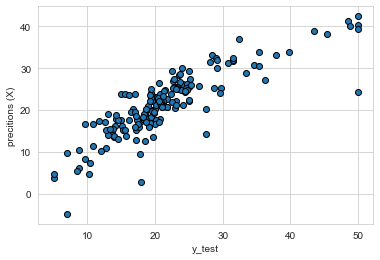

In [89]:
sns.set_style('whitegrid')

plt.scatter(y_test,predictions,edgecolor="black")
plt.xlabel('y_test')
plt.ylabel('precitions (X)');
#The overall positive correlation, shows that these predictions are accurate for the most part, with some outliers

**Residual plot**

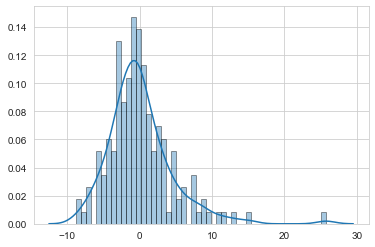

In [90]:
sns.distplot((y_test-predictions),bins=50,hist_kws=dict(edgecolor="k")); 
#residuals= y_test-predictions
        # =actual house prices-predictions
    
#residuals are normally distributed, which is good
#It also skews to the left, similarly to the plot of the actual house prices
#This shows that choosing to do a Linear regression, was a good model choice

## Regression Evaluation Metrics

In [91]:
from sklearn import metrics

- **Mean Absolute Error (MAE)** is the mean of the absolute value of the errors --> <font size="2"><i>easiest to understand, because it's the average error</i></font>
- **Mean Squared Error (MSE)** is the mean of the squared errors --> <font size="2"><i>slighlty more useful than **MAE**, because it "punishes" larger errors</i></font>
- **Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors --> <font size="2"><i>even more popular than **MSE**, because RMSE is interpretable in the "y" units</i></font>

In [92]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) #RMSE=$4552.36

MAE: 3.1737424602225945
MSE: 20.46002262243093
RMSE: 4.5232756518292065
